In [10]:
from flymazerl.agents.qlearning import DFIQLearnerHM_acceptreject
from flymazerl.gym.environment import ymaze_static
import numpy as np
import matplotlib.pyplot as plt

In [11]:
env = ymaze_static(100,0.25)
agent = DFIQLearnerHM_acceptreject(env)

In [13]:
action_set = np.loadtxt("full_action_set.csv", delimiter=",", dtype=np.int32)
reward_set = np.loadtxt("full_reward_set.csv", delimiter=",", dtype=np.int32)
model,data,post_predictive = agent.fit(actions_set=action_set, rewards_set=reward_set, nparallel=2, return_predictives=True)

WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a 

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 69312 seconds.
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test 

WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a 

                 mean     sd  hdi_2.5%  ...  ess_bulk  ess_tail  r_hat
init_q_mean[0]  0.068  0.025     0.019  ...      31.0      33.0   1.05
init_q_mean[1]  0.114  0.019     0.075  ...      31.0      34.0   1.07
init_q_0[0]     0.062  0.045    -0.023  ...      79.0     300.0   1.02
init_q_0[1]     0.066  0.043    -0.020  ...     114.0     175.0   1.01
init_q_0[2]     0.067  0.045    -0.015  ...      61.0     111.0   1.03
...               ...    ...       ...  ...       ...       ...    ...
init_q[129,1]   0.141  0.045     0.065  ...      35.0     362.0   1.05
init_q[130,0]   0.074  0.044    -0.011  ...      64.0     169.0   1.03
init_q[130,1]   0.102  0.047     0.008  ...      75.0     336.0   1.07
init_q[131,0]   0.080  0.040    -0.004  ...      69.0     134.0   1.04
init_q[131,1]   0.099  0.049    -0.005  ...     100.0     290.0   1.06

[1598 rows x 9 columns]


In [14]:
# create a summary of the trace
from pymc3.stats import summary
from pymc3.plots import plot_trace,forestplot, plot_posterior, plot_ppc
summary_df = summary(data)

C:\Users\labadmin\AppData\Local\Temp\ipykernel_1104\1305322851.py:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  forestplot(data,combined=True,var_names=["alpha"])


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

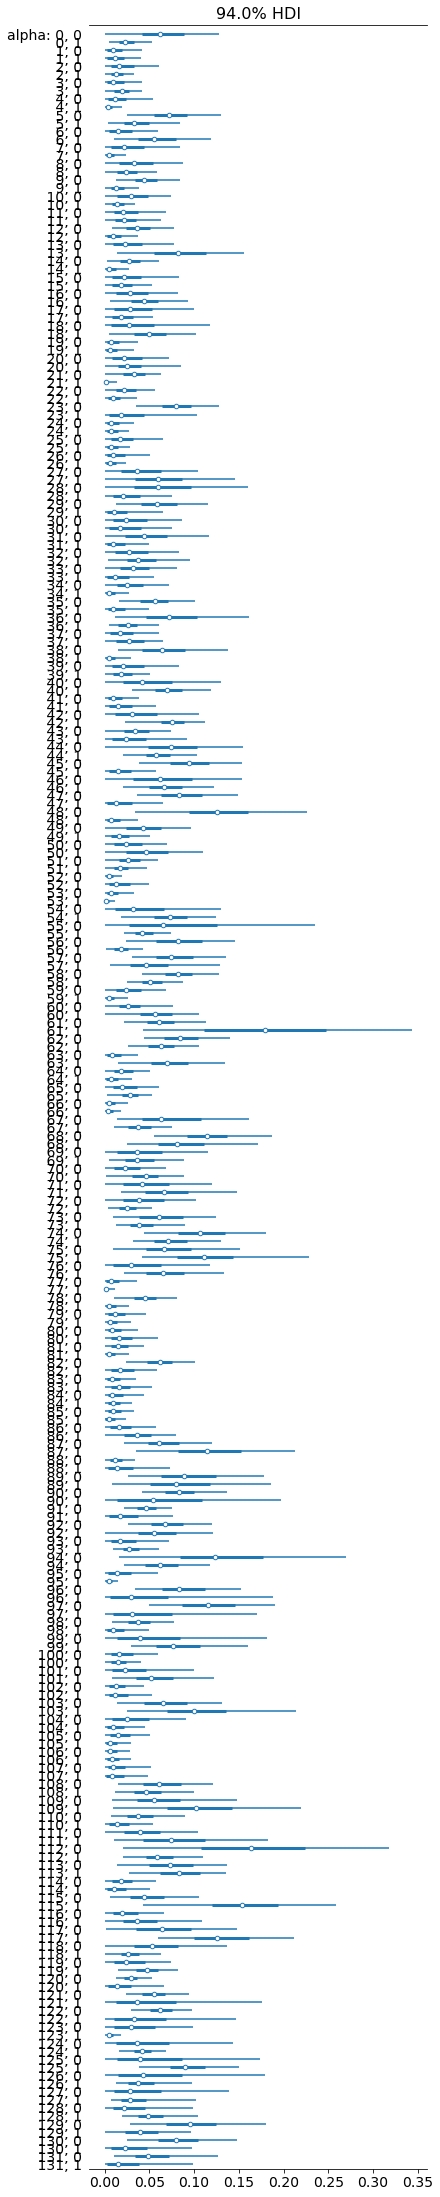

In [15]:
# make a forest plot of the trace
forestplot(data,combined=True,var_names=["alpha"])

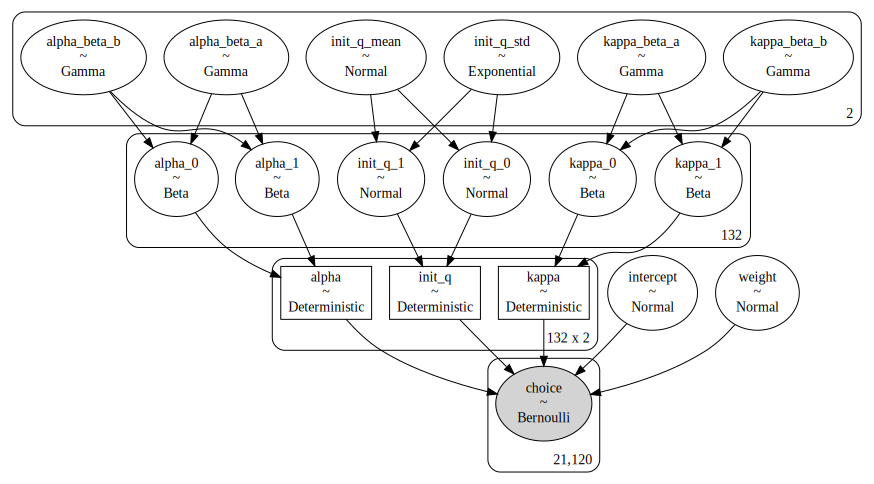

In [16]:
import pymc3 as pm

pm.model_to_graphviz(model)

In [17]:
post_predictive['choice']

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

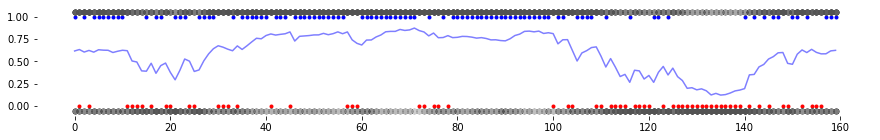

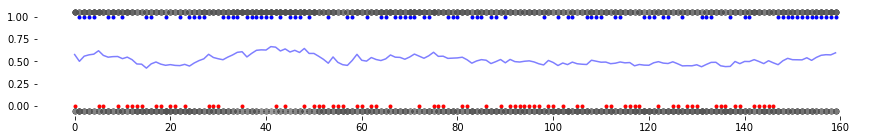

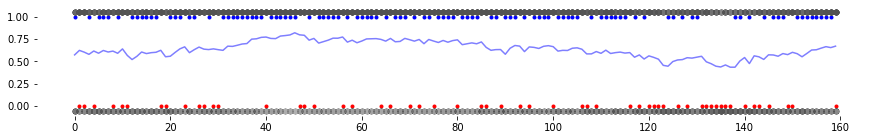

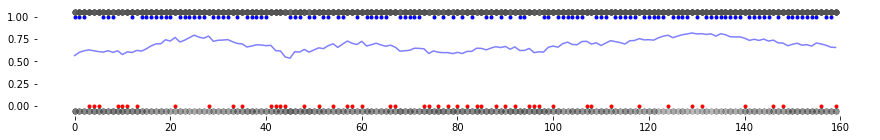

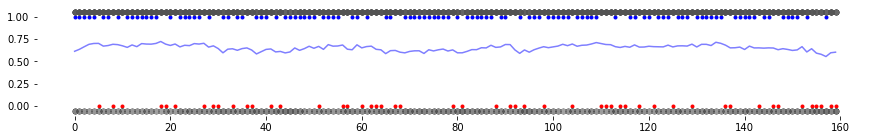

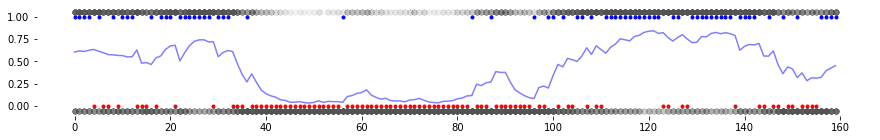

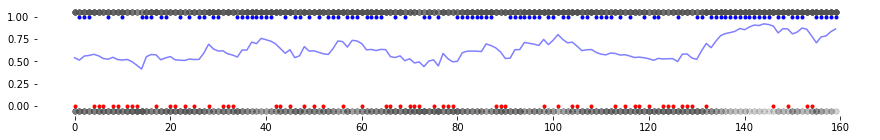

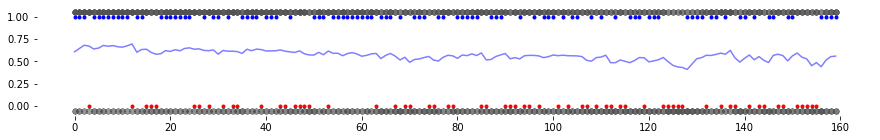

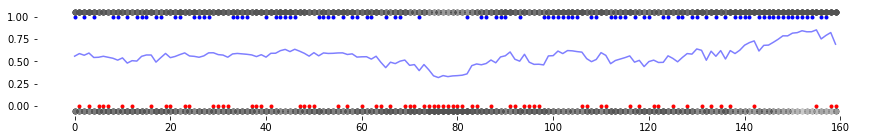

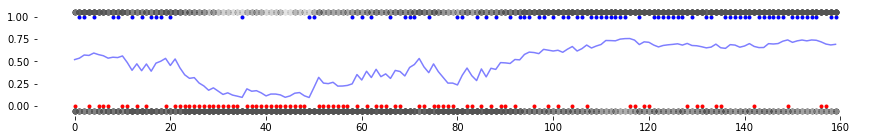

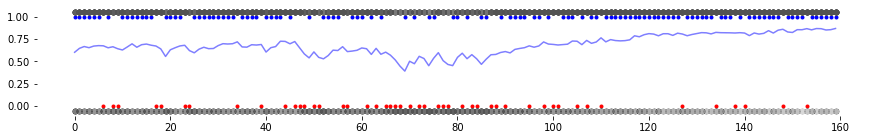

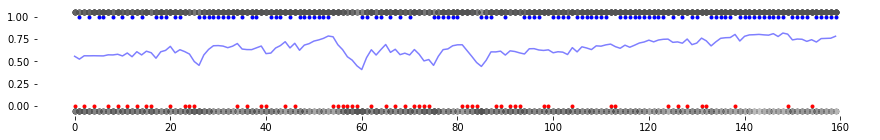

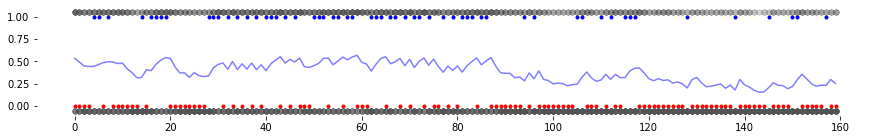

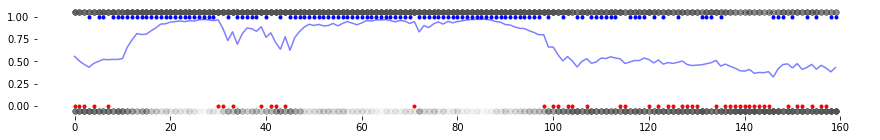

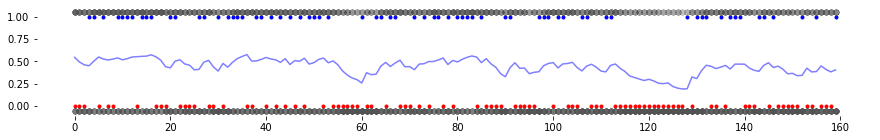

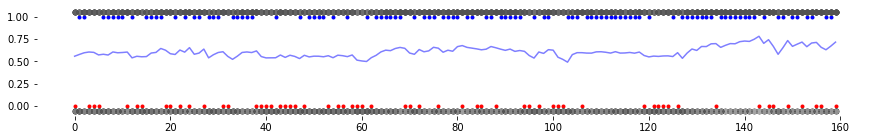

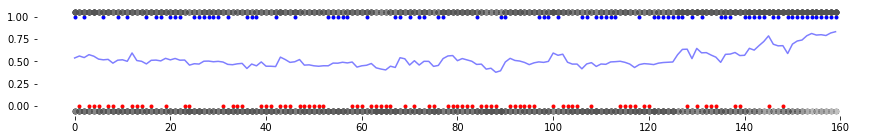

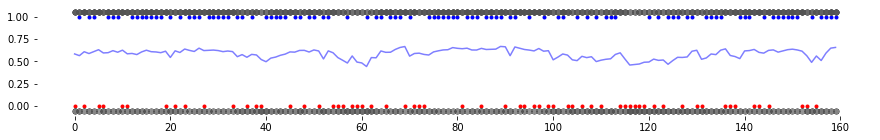

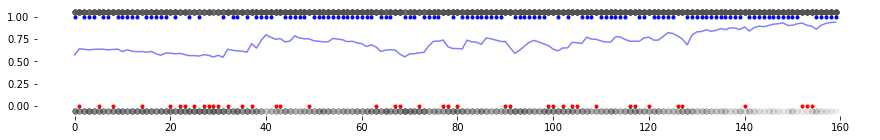

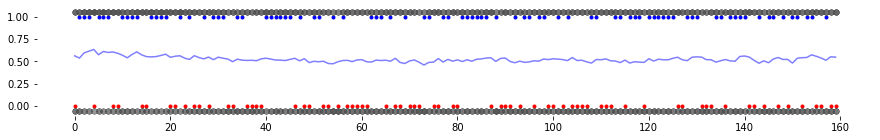

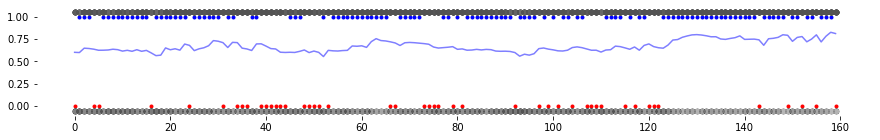

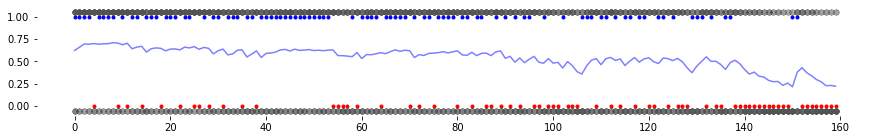

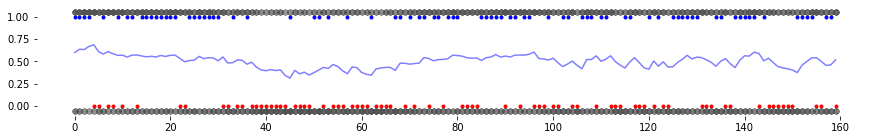

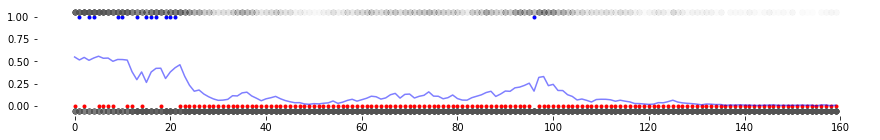

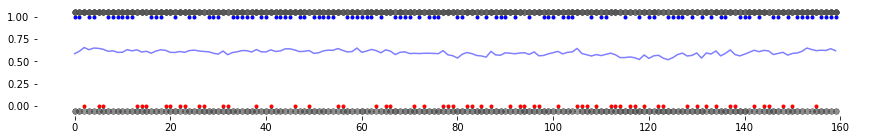

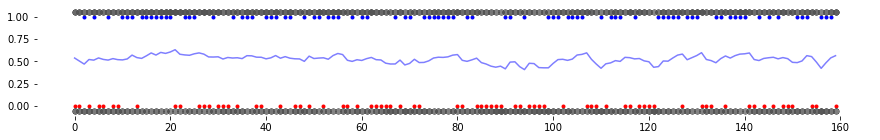

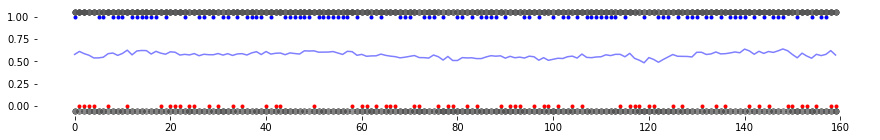

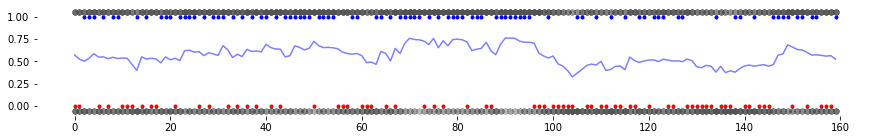

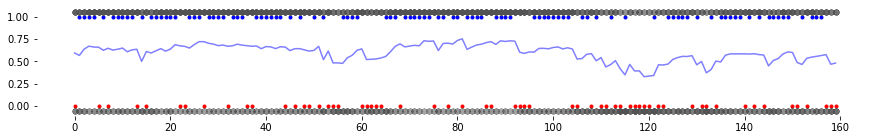

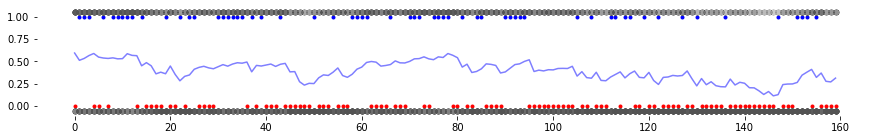

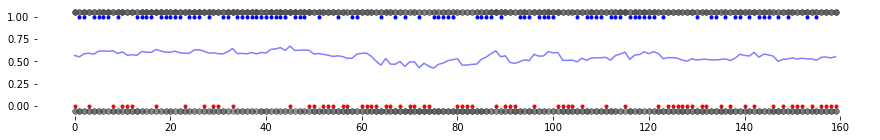

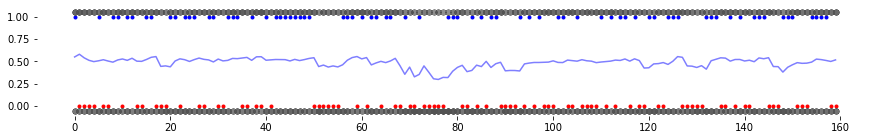

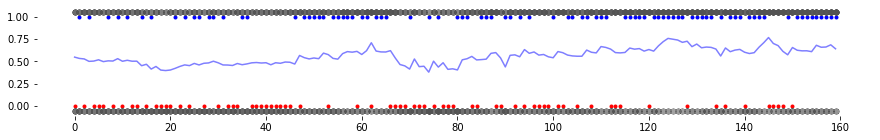

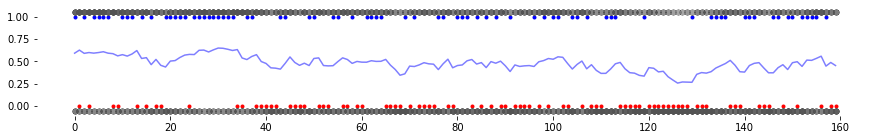

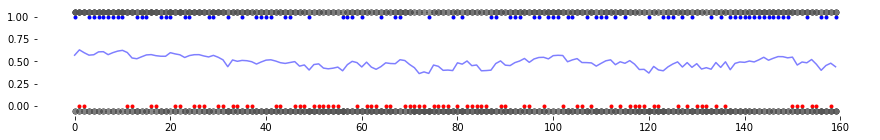

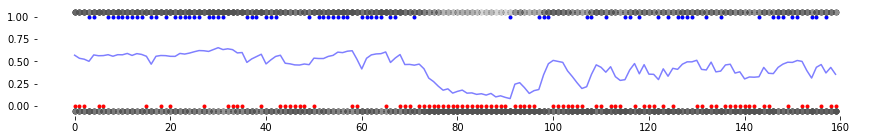

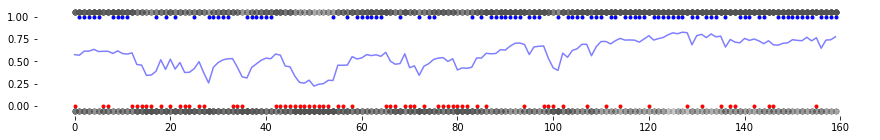

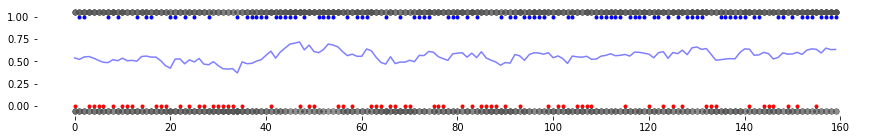

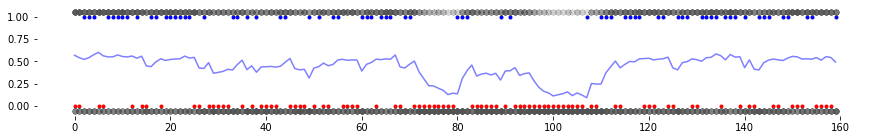

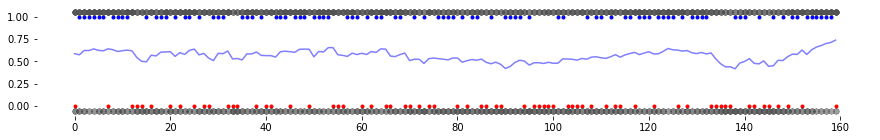

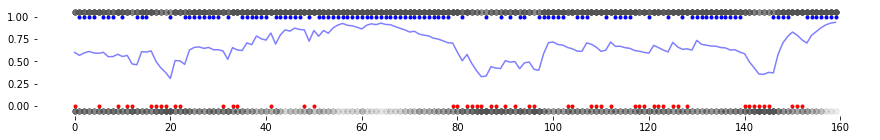

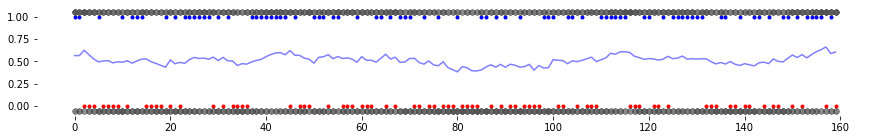

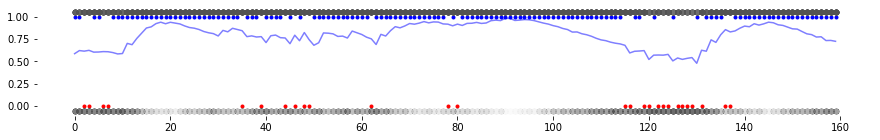

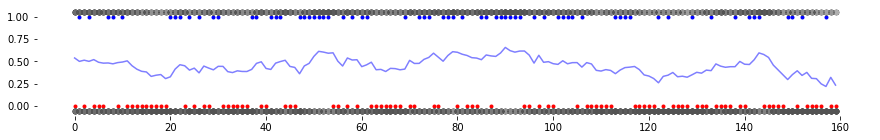

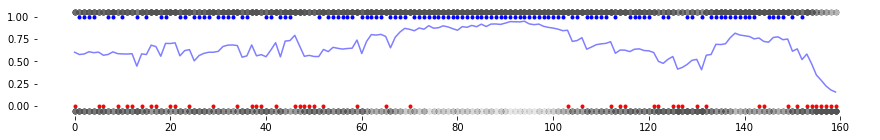

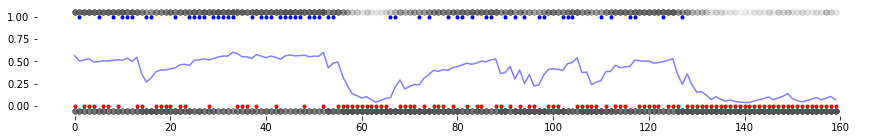

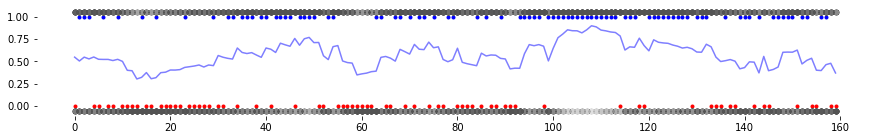

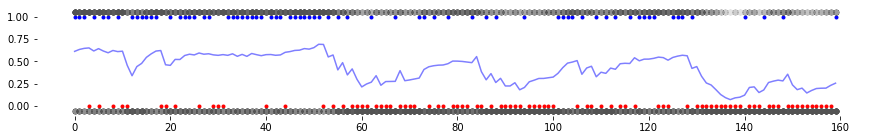

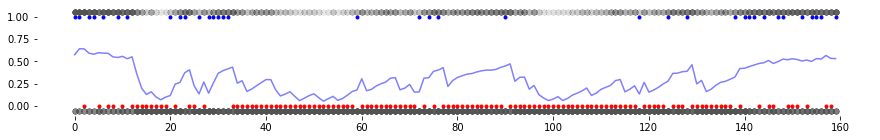

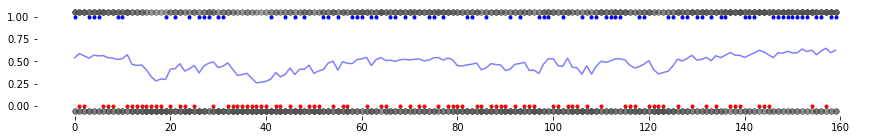

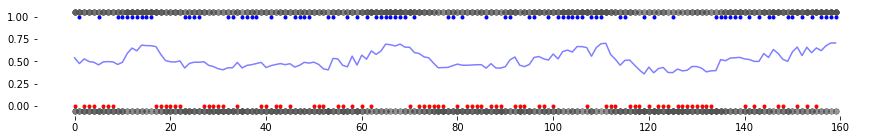

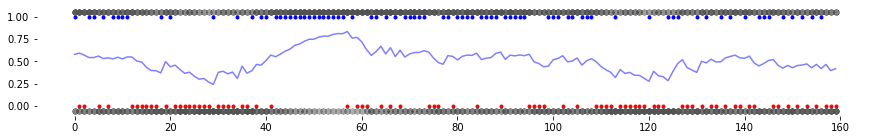

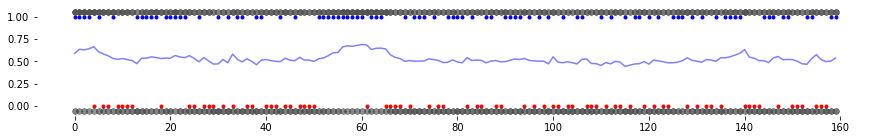

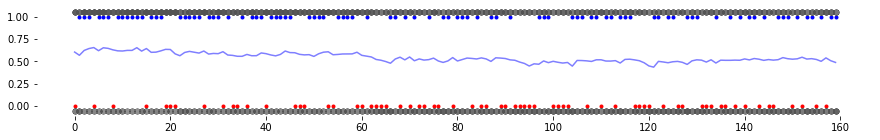

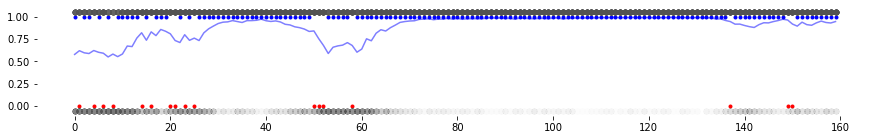

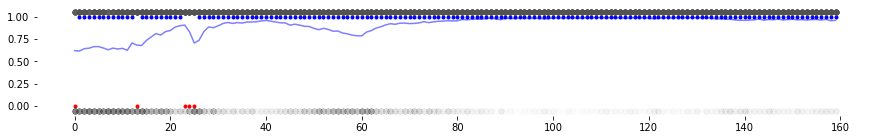

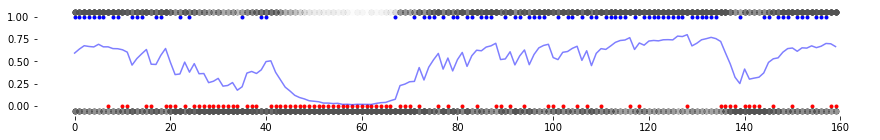

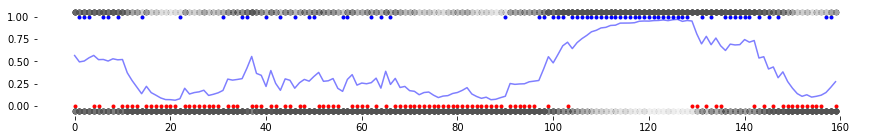

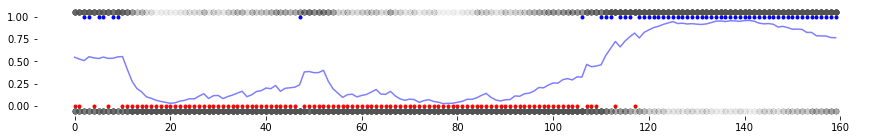

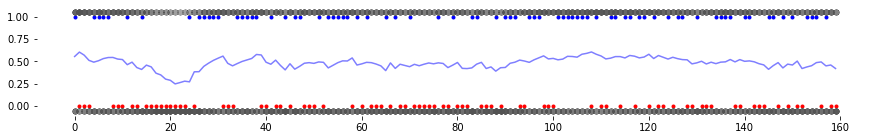

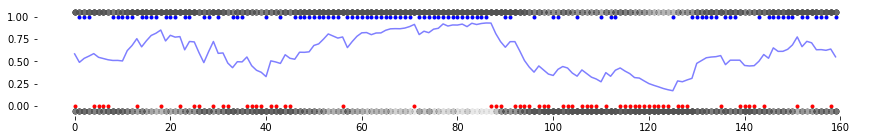

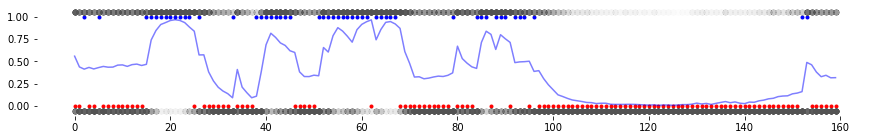

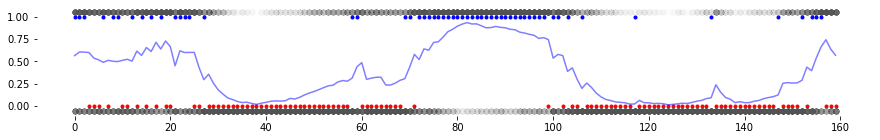

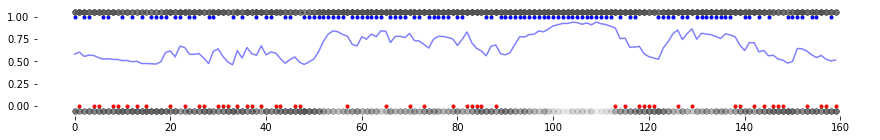

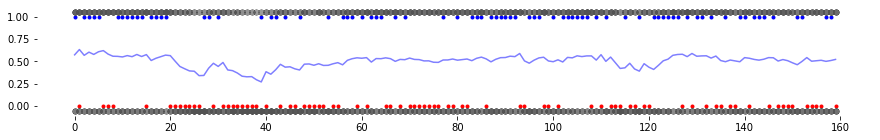

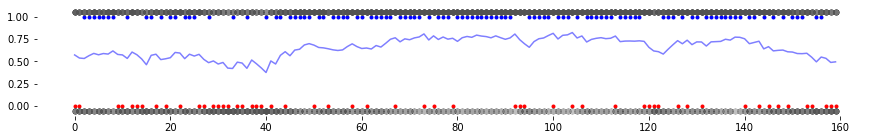

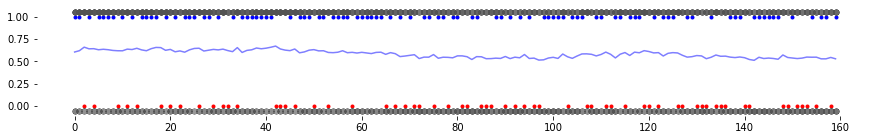

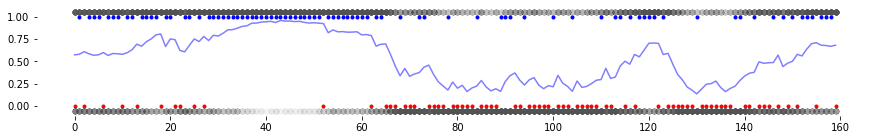

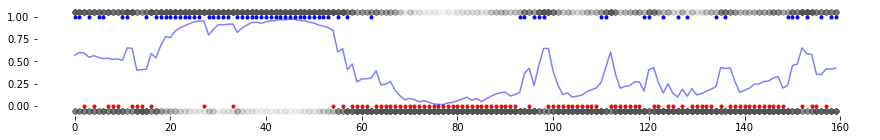

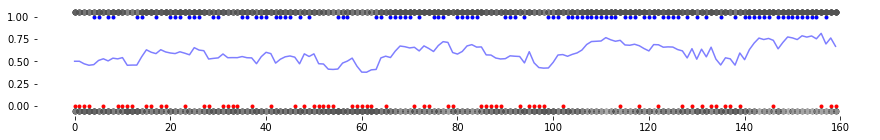

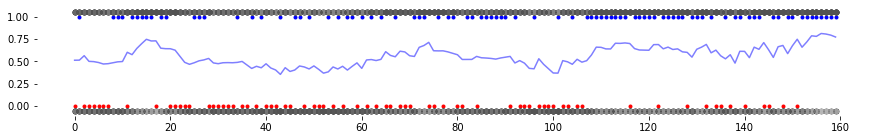

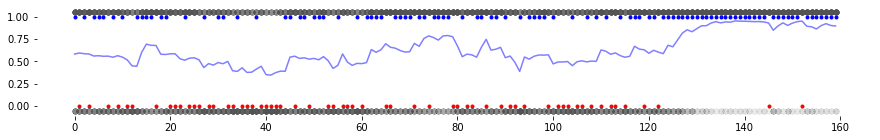

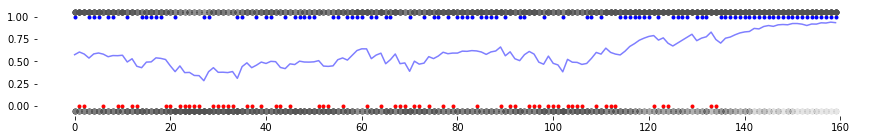

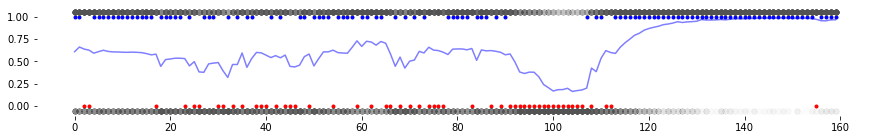

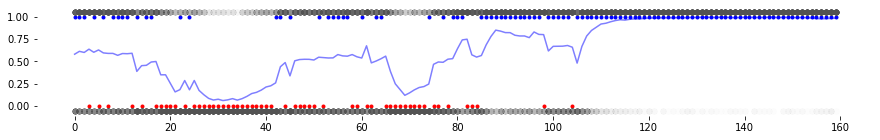

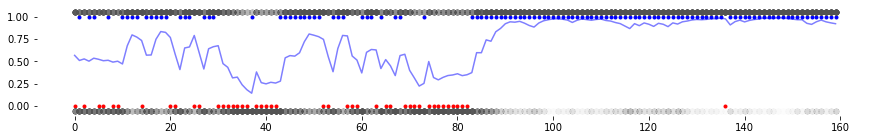

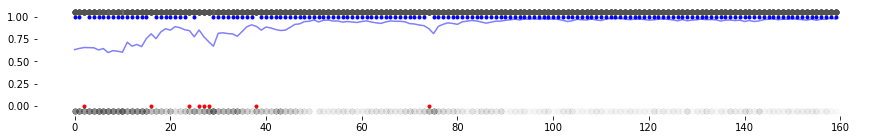

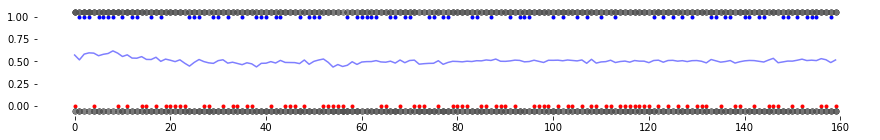

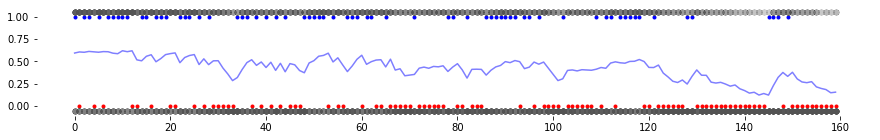

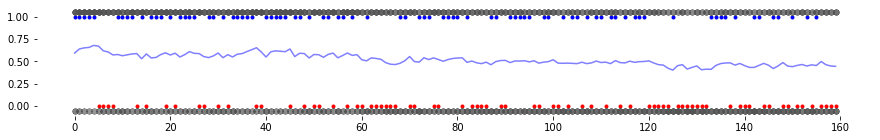

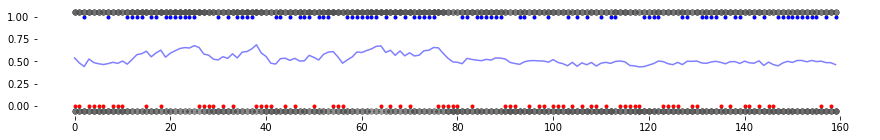

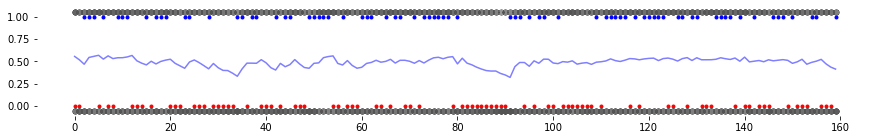

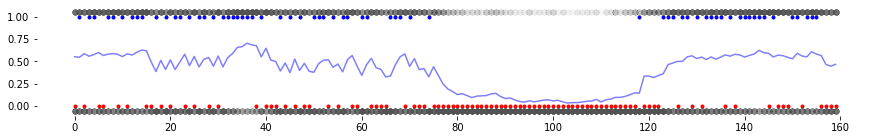

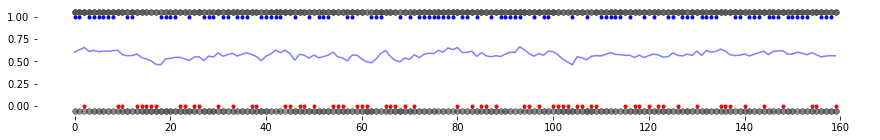

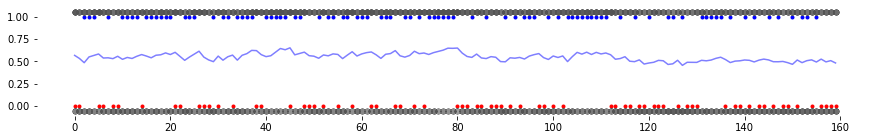

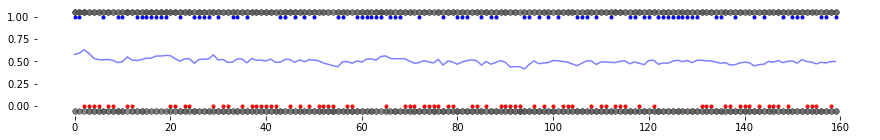

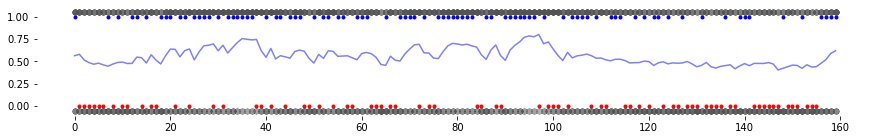

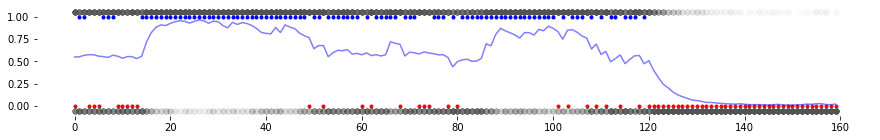

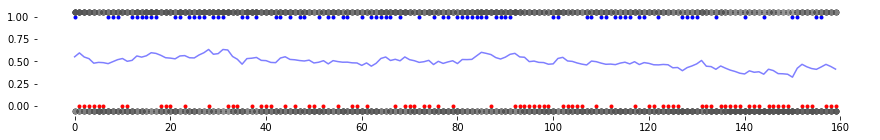

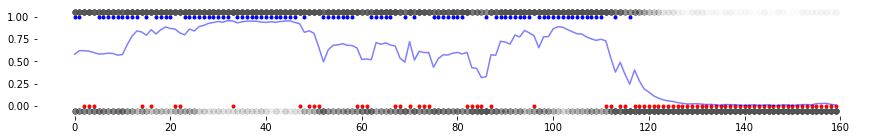

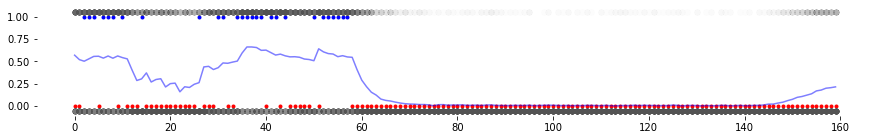

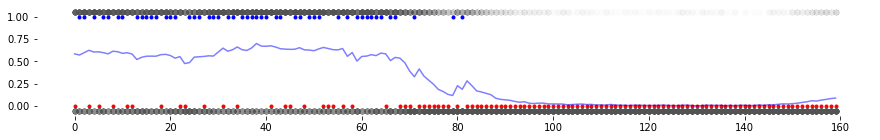

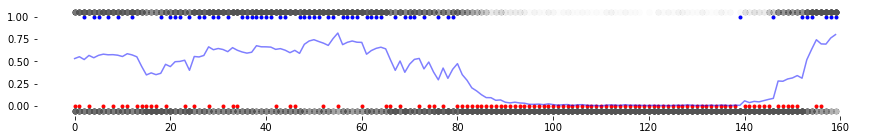

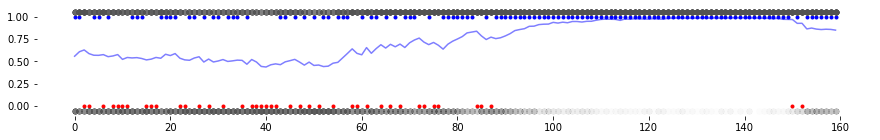

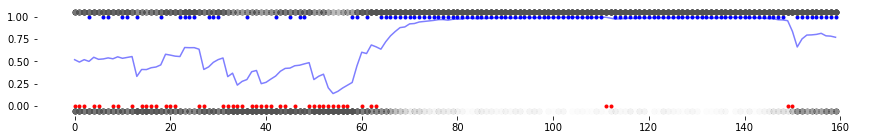

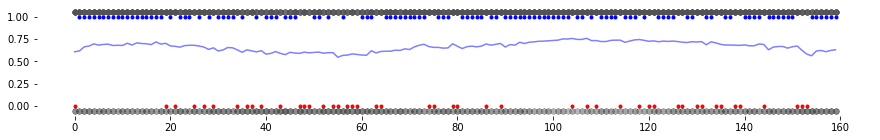

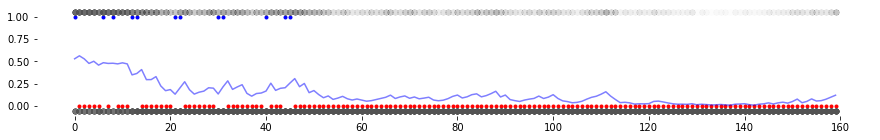

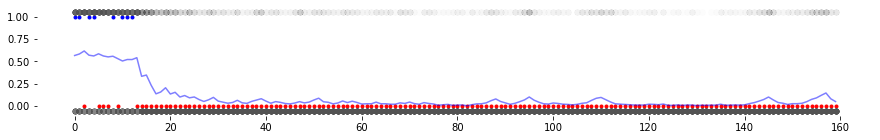

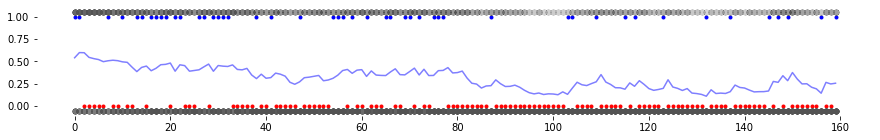

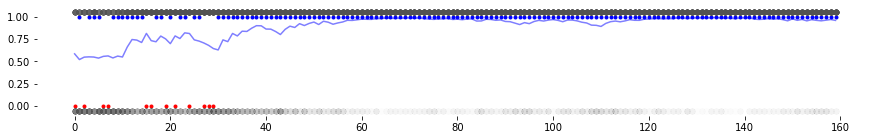

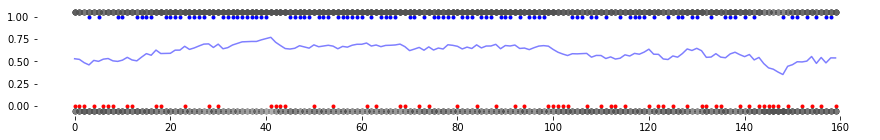

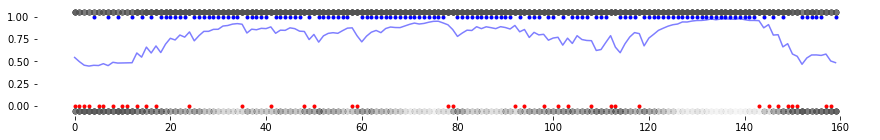

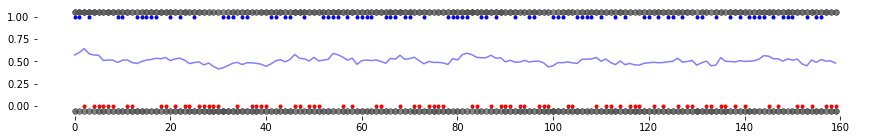

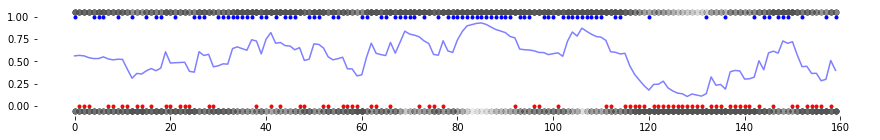

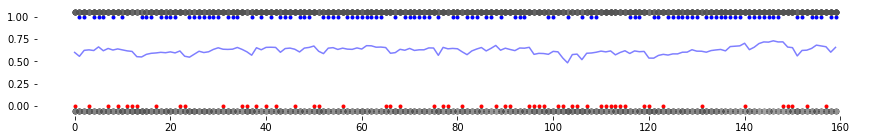

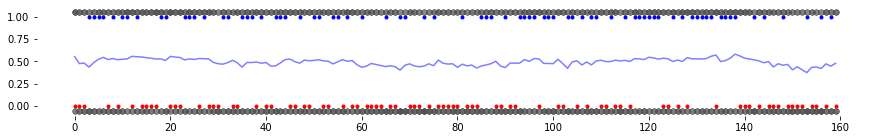

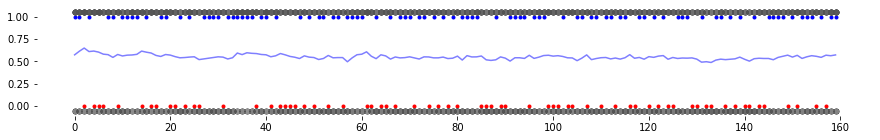

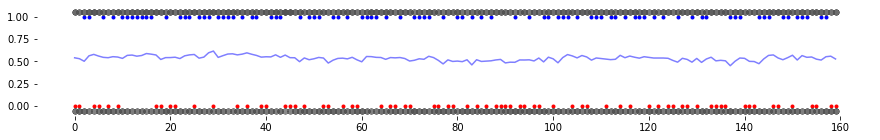

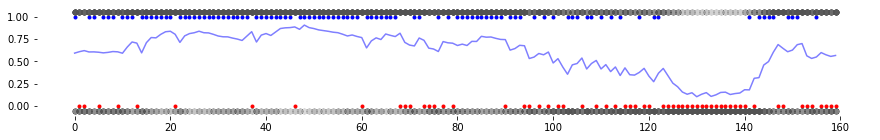

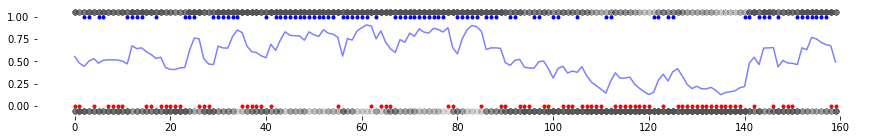

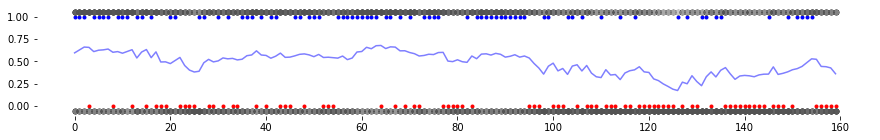

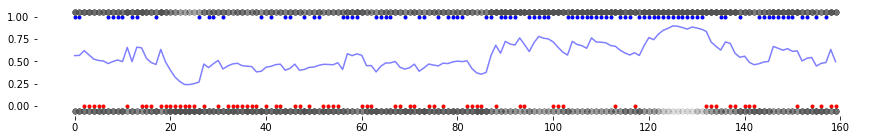

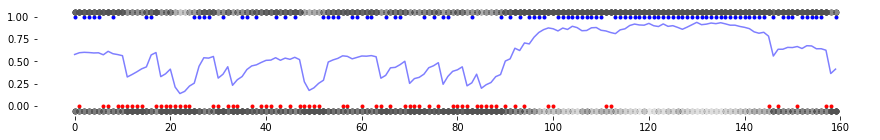

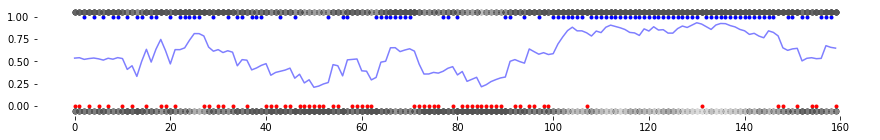

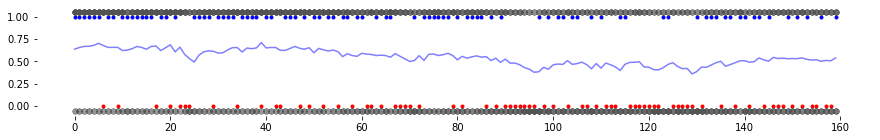

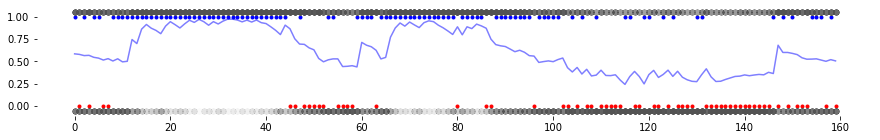

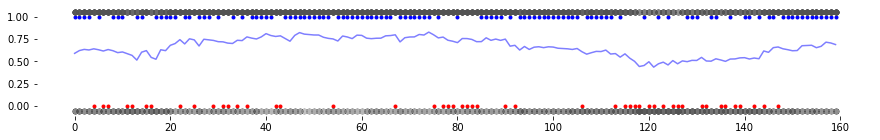

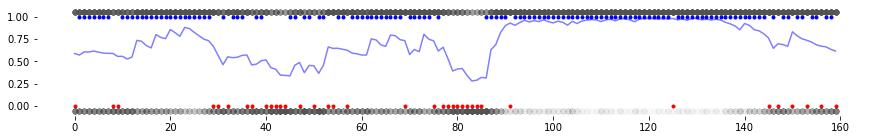

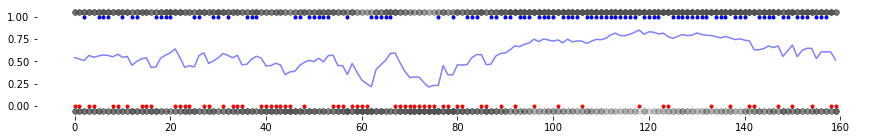

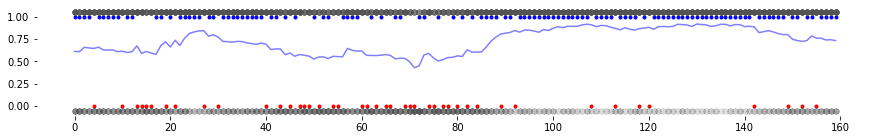

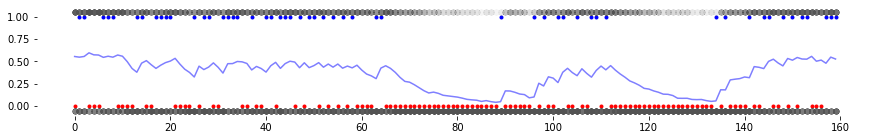

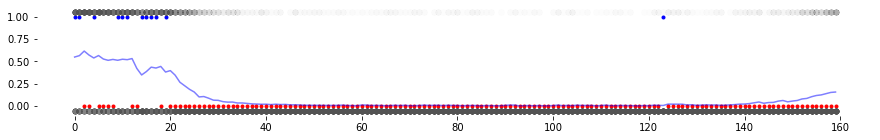

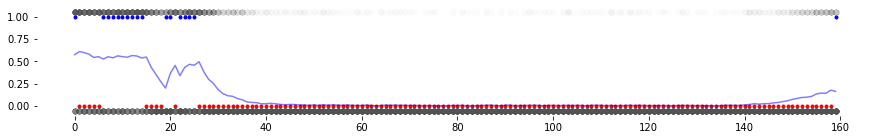

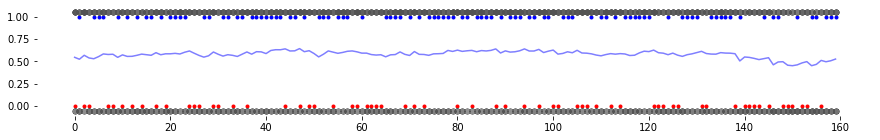

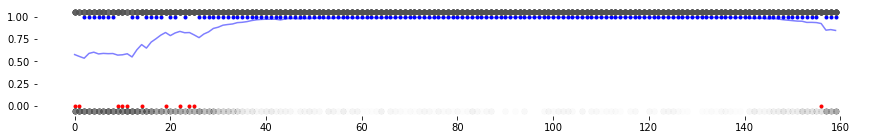

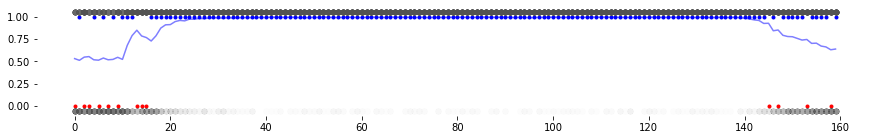

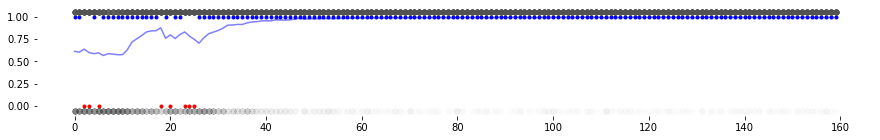

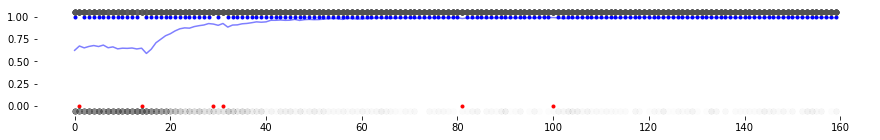

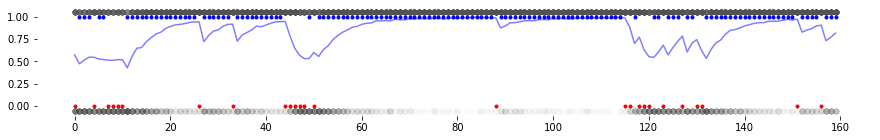

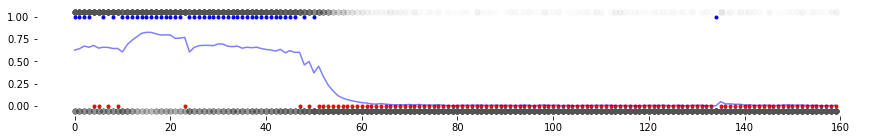

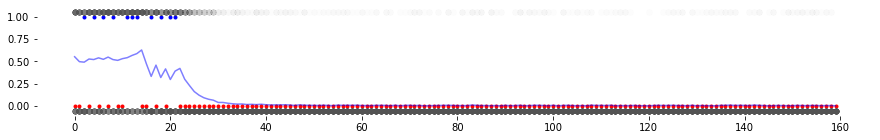

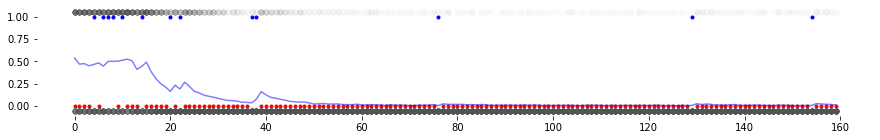

In [20]:
from statistics import variance

post_predictions = np.array_split(post_predictive['choice'], 132, axis=1)

for i in range(len(action_set)):
    fig,ax = plt.subplots(1,1,figsize=(15,2))
    choice_0 = np.arange(len(action_set[i]))[action_set[i]==0]
    plt.plot(choice_0,np.zeros_like(choice_0),'.',color='red')
    choice_1 = np.arange(len(action_set[i]))[action_set[i]==1]
    plt.plot(choice_1,np.ones_like(choice_1),'.',color='blue')
    # plot the posterior predictive
    post_mean = np.mean(post_predictions[i],axis=0)
    plt.plot(np.arange(160),post_mean,'-',color='blue',alpha=0.5)
    for j in range(len(post_predictions[i])//10):
        plt.plot(np.arange(160),0.5+(post_predictions[i][j]-0.5)*1.1,'o',color='k',alpha=0.01)
    plt.box(False)
    plt.show()

In [11]:
pm.sample_prior_predictive(samples=1000, model=model)

c:\ProgramData\Anaconda3\envs\flymazerl\lib\site-packages\theano\tensor\basic.py:369: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.complex(data)  # works for all numeric scalars
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{:int16:}.0
WARNING (theano.tensor.opt): Cannot construct a scalar test value from a test value with no size: Subtensor{int16::}.0
WAR

ValueError: Domain error in arguments.